In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Project 1


## Phase 1: Work using Jupyter (POC)

1. Download the csv File Manually 
   https://data.worldbank.org/indicator/NY.ADJ.NNTY.PC.CD?end=2019&locations=DE-US-FR&start=1970
2. Extract the record for Germany and transpose it into a vertical presentation
3. Train the model using LinearRegression
4. Predict via an external file the years from 2023 -> 2030
5. Save the predicted data into a new csv file

## Phase 2: Write a Python Program (Delivery)
1. JSON File (config)
   1. required country
   2. input file name
   3. estimated_start_year: 2023
   4. estimated_stop_year: 2030
2. Functional Oriented or Object Oriented 
   
Deadline: Tomorrow Afternoon 14.06.2022
Individual Work

In [2]:
# reading only row with country Germany or getting information regarding germany.

df=pd.read_csv('data.csv',skiprows=3)
germany_df=df.loc[df['Country Name'] =='Germany'].T
germany_df


,55
Country Name,Germany
Country Code,DEU
Indicator Name,Adjusted net national income per capita (curre...
Indicator Code,NY.ADJ.NNTY.PC.CD
1960,NaN
...,...
2018,40263.990413
2019,39093.199633
2020,NaN
2021,NaN


In [3]:
germany_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Country Name to Unnamed: 66
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   55      54 non-null     object
dtypes: object(1)
memory usage: 3.1+ KB


In [4]:
germany_df.head(35)

,55
Country Name,Germany
Country Code,DEU
Indicator Name,Adjusted net national income per capita (curre...
Indicator Code,NY.ADJ.NNTY.PC.CD
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
1965,NaN


In [5]:
germany_df.tail(20)

,55
2003,24728.890435
2004,28411.438842
2005,28838.944004
2006,30768.185599
2007,35119.002599
2008,37932.477839
2009,34720.876775
2010,34850.286867
2011,39513.839158
2012,36963.307354


In [6]:
germany_df.columns

Int64Index([55], dtype='int64')

In [7]:
germany_df=germany_df.reset_index()
germany_df.head(5)

,index,55
0,Country Name,Germany
1,Country Code,DEU
2,Indicator Name,Adjusted net national income per capita (curre...
3,Indicator Code,NY.ADJ.NNTY.PC.CD
4,1960,NaN


In [8]:
germany_df=germany_df.drop(range(0,4)) # drop first 4 rows which had no use for us.
germany_df.reset_index()

,level_0,index,55
0,4,1960,NaN
1,5,1961,NaN
2,6,1962,NaN
3,7,1963,NaN
4,8,1964,NaN
...,...,...,...
58,62,2018,40263.990413
59,63,2019,39093.199633
60,64,2020,NaN
61,65,2021,NaN


In [9]:

#renaming columns and resetting index to new starting from 0.
germany_df.columns = ['year', 'Per_capita_Income_of_Germany']
germany_df.reset_index(drop=True,inplace=True)


In [10]:
germany_df.head(20)


,year,Per_capita_Income_of_Germany
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


In [11]:
our_data=germany_df.iloc[10:]  # this is the data we will be working on
our_data.reset_index(drop=True,inplace=True)
our_data.head(5)

,year,Per_capita_Income_of_Germany
0,1970,2398.506334
1,1971,2757.519364
2,1972,3282.538314
3,1973,4350.983683
4,1974,4827.999014


In [12]:
our_data.tail()

,year,Per_capita_Income_of_Germany
48,2018,40263.990413
49,2019,39093.199633
50,2020,NaN
51,2021,NaN
52,Unnamed: 66,NaN


In [13]:
our_data.dtypes


year                            object
Per_capita_Income_of_Germany    object
dtype: object

In [14]:
# our_data = our_data.astype({"year":str})
# our_data.dtypes



In [15]:
new_df=our_data.fillna(0)
new_df=our_data.fillna(method='ffill',limit=2) # filling the missing values in 2020 and 2021 with values of 2019
new_df.tail()

,year,Per_capita_Income_of_Germany
48,2018,40263.990413
49,2019,39093.199633
50,2020,39093.199633
51,2021,39093.199633
52,Unnamed: 66,NaN


In [16]:
new_df= new_df.drop([52]) # dropping the last row
new_df.tail()

,year,Per_capita_Income_of_Germany
47,2017,37528.607321
48,2018,40263.990413
49,2019,39093.199633
50,2020,39093.199633
51,2021,39093.199633


In [17]:
new_df = new_df.astype({"Per_capita_Income_of_Germany":int})
new_df.dtypes

year                            object
Per_capita_Income_of_Germany     int32
dtype: object

In [18]:
# new_df=new_df.interpolate()
# new_df.tail()

In [19]:
new_df['year']=pd.to_numeric(new_df['year'])
new_df.dtypes

year                            int64
Per_capita_Income_of_Germany    int32
dtype: object

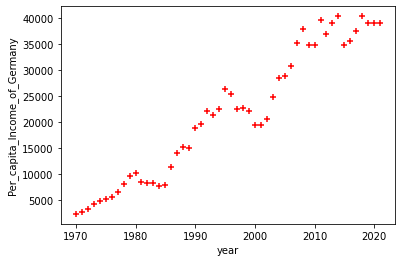

In [20]:
plt.xlabel("year")
plt.ylabel("Per_capita_Income_of_Germany")
plt.scatter(new_df.year, new_df.Per_capita_Income_of_Germany, color ="red", marker = "+")

# Split Data in input(x) and output(Y)

In [21]:
# Input Data
input_df = new_df.drop("Per_capita_Income_of_Germany", axis="columns")
input_df.head()

# Output Data
income = new_df.Per_capita_Income_of_Germany
income.head()


0    2398
1    2757
2    3282
3    4350
4    4827
Name: Per_capita_Income_of_Germany, dtype: int32

# Model train with Linear Regression

In [22]:
# Create a regresstion model

reg = linear_model.LinearRegression()

# Train the model to find the m(slope) and b(intercept)
reg.fit(input_df, income)

LinearRegression()

# Show the coefficients

In [23]:
print(reg.coef_) # Slope m
print(reg.intercept_) # intercept b

[810.85968582]
-1596549.0607444716


# Manual prediction

In [24]:
#y=mx+b
area = 2022

income_2022 = 810.85968582*2022 + -1596549.0607444716
print(income_2022) # 800

43009.22398356837


# Model Prediction

In [25]:
reg.predict([[2022]])

c:\Python3104\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43009.2239819])

# Prediction from external File

In [26]:
prediction_df = pd.read_csv("./new_incomedata.csv")
prediction_df.head()

,year
0,2023
1,2024
2,2025
3,2026
4,2027


In [27]:
# Predicted Prices in numpy array
predicted_price = reg.predict(prediction_df)

# Attach the array into the original dataframe
prediction_df["predicted_price"] = predicted_price

prediction_df.head()

,year,predicted_price
0,2023,43820.083668
1,2024,44630.943354
2,2025,45441.803039
3,2026,46252.662725
4,2027,47063.522411


In [28]:
# Save the predicted data into a new csv file


prediction_df.to_csv("./predicted_income_upto_2030.csv", index=False)

In [ ]:
our_json={'required_country':'germany','input_file_name': 'etwas','estimated_start':'2023','estimated_stop':'2030'}